In [3]:
# Install required libraries
!pip install ultralytics opencv-python-headless matplotlib scikit-learn --quiet

In [4]:
# Import required libraries
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Set dataset paths 
train_images_path = '/kaggle/input/posaris-data/organized_dataset/train/images'
val_images_path = '/kaggle/input/posaris-data/organized_dataset/val/images'
train_labels_path = '/kaggle/input/posaris-data/organized_dataset/train/labels'
val_labels_path = '/kaggle/input/posaris-data/organized_dataset/val/labels'

In [5]:
# Preprocess Images
def preprocess_images(image_folder):
    """
    Resize and normalize images to match YOLO input size (640x640).
    """
    print(f"Preprocessing images in {image_folder}")
    for image_name in tqdm(os.listdir(image_folder)):
        if image_name.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(image_folder, image_name)
            image = cv2.imread(image_path)

            # Resize to 640x640
            resized_image = cv2.resize(image, (640, 640))

            # Save the resized image back
            cv2.imwrite(image_path, resized_image)

# Preprocess training and validation images
preprocess_images(train_images_path)
preprocess_images(val_images_path)

Preprocessing images in /kaggle/input/posaris-data/organized_dataset/train/images


100%|██████████| 432/432 [00:03<00:00, 112.15it/s]


Preprocessing images in /kaggle/input/posaris-data/organized_dataset/val/images


100%|██████████| 108/108 [00:01<00:00, 93.22it/s]


In [9]:
# Define dataset YAML file
data_yaml = """
train: /kaggle/input/posaris-data/organized_dataset/train/images
val: /kaggle/input/posaris-data/organized_dataset/val/images

nc: 2
names: ['normal_skin', 'psoriasis_skin']
"""
with open('data.yaml', 'w') as f:
    f.write(data_yaml)


In [5]:
# Load the YOLOv8 model (pretrained on COCO)
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 105MB/s]


In [10]:
print(model.yaml)


{'nc': 80, 'depth_multiple': 0.33, 'width_multiple': 0.25, 'backbone': [[-1, 1, 'Conv', [64, 3, 2]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 3, 'C2f', [128, True]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 6, 'C2f', [256, True]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 6, 'C2f', [512, True]], [-1, 1, 'Conv', [1024, 3, 2]], [-1, 3, 'C2f', [1024, True]], [-1, 1, 'SPPF', [1024, 5]]], 'head': [[-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 6], 1, 'Concat', [1]], [-1, 3, 'C2f', [512]], [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 4], 1, 'Concat', [1]], [-1, 3, 'C2f', [256]], [-1, 1, 'Conv', [256, 3, 2]], [[-1, 12], 1, 'Concat', [1]], [-1, 3, 'C2f', [512]], [-1, 1, 'Conv', [512, 3, 2]], [[-1, 9], 1, 'Concat', [1]], [-1, 3, 'C2f', [1024]], [[15, 18, 21], 1, 'Detect', ['nc']]], 'ch': 3}


In [13]:
# Train the YOLOv8 model
train_results = model.train(
    data='data.yaml',         # Path to the dataset YAML file
    epochs=100,                # Number of epochs
    imgsz=640,                # Image size
    batch=16,                 # Batch size
    name='psoriasis_detection_final', # Name for the training session
    project='/kaggle/working/yolo_project',  # Path to save results
    save=True  # Ensure the best model is saved
)

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/kaggle/working/yolo_project, name=psoriasis_detection_final, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

train: Scanning /kaggle/input/posaris-data/organized_dataset/train/labels... 432 images, 0 backgrounds, 0 corrupt: 100%|██████████| 432/432 [00:00<00:00, 825.69it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/posaris-data/organized_dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/posaris-data/organized_dataset/val/labels... 108 images, 0 backgrounds, 0 corrupt: 100%|██████████| 108/108 [00:00<00:00, 801.21it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/posaris-data/organized_dataset/val is not writeable, cache not saved.


Plotting labels to /kaggle/working/yolo_project/psoriasis_detection_final/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/yolo_project/psoriasis_detection_final
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.26G     0.3648     0.4411      1.058         49        640: 100%|██████████| 27/27 [00:05<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all        108        108      0.895      0.878      0.919      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.17G     0.3883     0.4243       1.07         53        640: 100%|██████████| 27/27 [00:04<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        108        108      0.936      0.935      0.927      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.17G     0.4102     0.4201      1.074         49        640: 100%|██████████| 27/27 [00:04<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        108        108      0.702      0.855      0.892      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.16G     0.4719     0.4498      1.131         44        640: 100%|██████████| 27/27 [00:04<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        108        108      0.896      0.921       0.93      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.16G     0.4744     0.4684      1.127         48        640: 100%|██████████| 27/27 [00:04<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        108        108      0.942      0.946      0.949      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.16G      0.459     0.4691      1.125         51        640: 100%|██████████| 27/27 [00:04<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        108        108       0.91      0.914      0.924      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.16G     0.4617     0.4506      1.116         43        640: 100%|██████████| 27/27 [00:04<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

                   all        108        108      0.823      0.932       0.91      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.16G     0.4498     0.4759      1.113         46        640: 100%|██████████| 27/27 [00:04<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.10it/s]

                   all        108        108      0.943      0.867      0.947      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.16G      0.437     0.4365      1.086         55        640: 100%|██████████| 27/27 [00:04<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        108        108       0.91      0.932      0.927      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.16G     0.4587     0.4117      1.112         57        640: 100%|██████████| 27/27 [00:04<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all        108        108      0.902      0.936      0.908      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.16G     0.4287     0.4235       1.09         55        640: 100%|██████████| 27/27 [00:04<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all        108        108      0.809      0.756      0.855      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.16G     0.4166     0.4097      1.082         51        640: 100%|██████████| 27/27 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        108        108      0.928      0.945      0.939      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.16G     0.4661     0.4266       1.13         45        640: 100%|██████████| 27/27 [00:04<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]

                   all        108        108      0.793       0.88      0.854      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.16G     0.4381     0.4518      1.116         41        640: 100%|██████████| 27/27 [00:04<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]

                   all        108        108      0.788      0.844      0.846      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.16G     0.4543     0.4343      1.133         51        640: 100%|██████████| 27/27 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        108        108      0.897      0.912      0.925      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.16G     0.4452     0.4377      1.111         44        640: 100%|██████████| 27/27 [00:04<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all        108        108      0.806      0.959      0.926      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.16G     0.4275     0.4415      1.082         48        640: 100%|██████████| 27/27 [00:04<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        108        108      0.783      0.817      0.855      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.16G     0.4062     0.3927      1.063         45        640: 100%|██████████| 27/27 [00:04<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        108        108      0.903      0.957      0.953        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.16G     0.4343     0.4238       1.11         46        640: 100%|██████████| 27/27 [00:04<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all        108        108       0.94      0.948      0.955      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.16G     0.3901     0.3709      1.071         53        640: 100%|██████████| 27/27 [00:04<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all        108        108      0.934      0.959      0.965       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.16G     0.4262     0.3895      1.091         42        640: 100%|██████████| 27/27 [00:04<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all        108        108      0.927      0.938      0.935      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.16G      0.426     0.4122      1.099         52        640: 100%|██████████| 27/27 [00:04<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all        108        108      0.963      0.981       0.97      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.16G     0.3944      0.373      1.065         52        640: 100%|██████████| 27/27 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        108        108      0.932      0.938      0.941      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.16G     0.3964     0.3748      1.065         56        640: 100%|██████████| 27/27 [00:04<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        108        108      0.932      0.964      0.952      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.16G     0.4209     0.4239      1.085         54        640: 100%|██████████| 27/27 [00:04<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        108        108      0.948      0.932      0.949      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.16G     0.4111     0.3774      1.074         58        640: 100%|██████████| 27/27 [00:04<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        108        108       0.96      0.955      0.957      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.16G     0.4021     0.3954      1.073         54        640: 100%|██████████| 27/27 [00:04<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        108        108      0.926       0.93      0.935      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.16G     0.4169     0.4025      1.083         46        640: 100%|██████████| 27/27 [00:04<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        108        108      0.972       0.94      0.945      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.16G      0.431     0.3963      1.107         51        640: 100%|██████████| 27/27 [00:04<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]

                   all        108        108      0.953      0.955      0.949      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.16G      0.402     0.3832      1.074         43        640: 100%|██████████| 27/27 [00:04<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        108        108      0.927      0.946      0.957      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.16G     0.3964     0.3709      1.074         49        640: 100%|██████████| 27/27 [00:04<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]

                   all        108        108      0.969      0.973      0.973      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.16G      0.389     0.3616       1.07         47        640: 100%|██████████| 27/27 [00:04<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        108        108      0.935       0.96      0.968      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.16G     0.3745     0.3568      1.064         54        640: 100%|██████████| 27/27 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.31it/s]

                   all        108        108       0.94      0.969      0.957       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.16G     0.3587     0.3575      1.043         40        640: 100%|██████████| 27/27 [00:04<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]

                   all        108        108      0.955      0.973      0.978      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.16G     0.3614     0.3525      1.052         49        640: 100%|██████████| 27/27 [00:04<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        108        108      0.854      0.963      0.963      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.16G     0.3897      0.358       1.07         53        640: 100%|██████████| 27/27 [00:04<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        108        108       0.91      0.981      0.973      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.16G     0.3803     0.3577      1.058         44        640: 100%|██████████| 27/27 [00:04<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        108        108       0.93      0.957      0.951      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.16G     0.3396     0.3361      1.036         49        640: 100%|██████████| 27/27 [00:04<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        108        108      0.928      0.936      0.937      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.16G     0.3795     0.3624      1.056         51        640: 100%|██████████| 27/27 [00:04<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        108        108      0.924      0.989      0.976      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.16G     0.3769     0.3326      1.074         51        640: 100%|██████████| 27/27 [00:04<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

                   all        108        108      0.839      0.899      0.948      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.16G     0.3848     0.3521       1.07         46        640: 100%|██████████| 27/27 [00:04<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        108        108      0.955      0.962      0.968      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.16G     0.3684      0.314      1.038         44        640: 100%|██████████| 27/27 [00:04<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        108        108      0.957      0.942      0.971      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.16G     0.3533     0.3185      1.051         44        640: 100%|██████████| 27/27 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all        108        108      0.943      0.981      0.968        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.16G     0.3452      0.323      1.033         49        640: 100%|██████████| 27/27 [00:04<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        108        108      0.955      0.965      0.966      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.16G     0.3599     0.3449       1.04         44        640: 100%|██████████| 27/27 [00:04<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]

                   all        108        108      0.944      0.962      0.965      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.16G       0.36     0.3359      1.051         44        640: 100%|██████████| 27/27 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        108        108       0.92      0.973       0.96      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.16G     0.3422     0.3244      1.027         49        640: 100%|██████████| 27/27 [00:04<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        108        108      0.909      0.946      0.937      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.16G     0.3542     0.3335      1.053         43        640: 100%|██████████| 27/27 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        108        108      0.935      0.942      0.944      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.16G     0.3612     0.3383       1.05         47        640: 100%|██████████| 27/27 [00:04<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        108        108      0.963      0.963      0.975      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.16G     0.3673     0.3176      1.046         52        640: 100%|██████████| 27/27 [00:04<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]

                   all        108        108      0.949      0.953       0.95      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.16G     0.3263     0.3188      1.048         50        640: 100%|██████████| 27/27 [00:04<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        108        108      0.959      0.971      0.975      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.16G     0.3252     0.3107      1.026         47        640: 100%|██████████| 27/27 [00:04<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        108        108      0.929      0.957      0.959      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.16G      0.347     0.3228      1.039         47        640: 100%|██████████| 27/27 [00:04<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all        108        108      0.944      0.948      0.967      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.16G     0.3279     0.2998      1.027         45        640: 100%|██████████| 27/27 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]

                   all        108        108      0.964      0.973       0.98      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.16G     0.3086     0.2893     0.9967         55        640: 100%|██████████| 27/27 [00:04<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        108        108      0.944      0.957      0.956      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.16G     0.3414     0.3047      1.041         48        640: 100%|██████████| 27/27 [00:04<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]

                   all        108        108      0.954      0.973      0.971      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.16G     0.3307     0.3115      1.018         59        640: 100%|██████████| 27/27 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all        108        108      0.946      0.965      0.965      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.16G     0.3167     0.3077      1.013         44        640: 100%|██████████| 27/27 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all        108        108      0.937       0.94      0.951       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.16G     0.3531     0.3165      1.052         55        640: 100%|██████████| 27/27 [00:04<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        108        108      0.939      0.965      0.959       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.16G     0.3096     0.2931      1.012         52        640: 100%|██████████| 27/27 [00:04<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]

                   all        108        108      0.961      0.981      0.975      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.16G     0.3287     0.3059      1.012         45        640: 100%|██████████| 27/27 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]

                   all        108        108      0.935      0.971      0.974      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.16G     0.3061      0.283      1.003         46        640: 100%|██████████| 27/27 [00:04<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        108        108        0.9      0.965      0.968       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.16G     0.3144     0.2834      1.014         47        640: 100%|██████████| 27/27 [00:04<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        108        108      0.931      0.964      0.977      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.16G     0.3121     0.2803      1.017         45        640: 100%|██████████| 27/27 [00:04<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        108        108      0.936      0.961      0.964      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.16G     0.3244     0.2729      1.027         55        640: 100%|██████████| 27/27 [00:04<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        108        108      0.954      0.945      0.948      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.16G     0.3242     0.3012      1.013         50        640: 100%|██████████| 27/27 [00:04<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        108        108      0.965       0.94      0.957      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.16G     0.3009     0.2855     0.9923         54        640: 100%|██████████| 27/27 [00:04<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]

                   all        108        108      0.957      0.947      0.957      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.16G     0.3025     0.2661      1.021         45        640: 100%|██████████| 27/27 [00:04<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        108        108      0.936      0.948      0.949      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.16G     0.3008     0.2695      1.004         48        640: 100%|██████████| 27/27 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]

                   all        108        108       0.96       0.94      0.966      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.16G     0.3059      0.268      1.007         44        640: 100%|██████████| 27/27 [00:04<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]

                   all        108        108      0.988      0.941      0.964       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.16G     0.3008     0.2788       1.01         49        640: 100%|██████████| 27/27 [00:04<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all        108        108       0.97      0.973      0.971      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.16G     0.3102     0.2871      1.009         51        640: 100%|██████████| 27/27 [00:04<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all        108        108      0.968      0.981      0.977      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.16G     0.3047     0.2633      1.002         58        640: 100%|██████████| 27/27 [00:04<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]

                   all        108        108      0.971      0.973      0.972      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.16G     0.2858     0.2729     0.9956         47        640: 100%|██████████| 27/27 [00:04<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        108        108      0.963      0.973      0.973      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.16G     0.2844     0.2633     0.9864         42        640: 100%|██████████| 27/27 [00:04<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        108        108      0.974       0.97      0.972      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.16G     0.2841     0.2678      1.002         52        640: 100%|██████████| 27/27 [00:04<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        108        108       0.97      0.964      0.972      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.16G     0.2863     0.2629     0.9991         43        640: 100%|██████████| 27/27 [00:04<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        108        108      0.955      0.957      0.957      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.16G     0.2739      0.259     0.9842         49        640: 100%|██████████| 27/27 [00:04<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all        108        108      0.963      0.973      0.973      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.16G     0.2815     0.2544     0.9955         47        640: 100%|██████████| 27/27 [00:04<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        108        108      0.958      0.965       0.97       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.16G     0.2614     0.2474     0.9749         44        640: 100%|██████████| 27/27 [00:04<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]

                   all        108        108      0.965      0.973      0.974      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.16G     0.2681      0.248     0.9843         51        640: 100%|██████████| 27/27 [00:04<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        108        108      0.972      0.981      0.981      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.16G     0.2932     0.2519       1.01         46        640: 100%|██████████| 27/27 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        108        108      0.951      0.965      0.972       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.16G     0.3016     0.2698      1.004         44        640: 100%|██████████| 27/27 [00:04<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        108        108       0.96      0.981       0.98      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.16G     0.2536     0.2492     0.9677         46        640: 100%|██████████| 27/27 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all        108        108      0.944      0.964      0.978      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.16G     0.2691     0.2527     0.9961         50        640: 100%|██████████| 27/27 [00:04<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all        108        108       0.95      0.973      0.974      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.16G     0.2752      0.244      0.989         56        640: 100%|██████████| 27/27 [00:04<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all        108        108      0.954      0.973      0.974      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.16G     0.2688     0.2464     0.9902         49        640: 100%|██████████| 27/27 [00:04<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all        108        108      0.949      0.965      0.969      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.16G     0.2649     0.2375     0.9837         44        640: 100%|██████████| 27/27 [00:04<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        108        108      0.951      0.973      0.982      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.16G     0.2399     0.2348     0.9711         49        640: 100%|██████████| 27/27 [00:04<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        108        108      0.946      0.973      0.979      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.16G     0.2555     0.2526     0.9901         52        640: 100%|██████████| 27/27 [00:04<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        108        108      0.935      0.965      0.973      0.853


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.16G     0.2583     0.3382      1.007         16        640: 100%|██████████| 27/27 [00:05<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

                   all        108        108      0.933      0.968      0.973      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.16G     0.2511     0.2084      1.024         16        640: 100%|██████████| 27/27 [00:04<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]

                   all        108        108      0.943      0.981      0.963      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.16G     0.2295      0.197     0.9925         16        640: 100%|██████████| 27/27 [00:04<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        108        108      0.941      0.981      0.962      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.16G     0.2275     0.1773      1.006         16        640: 100%|██████████| 27/27 [00:04<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

                   all        108        108      0.951      0.975      0.969      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.16G      0.216     0.1703     0.9609         16        640: 100%|██████████| 27/27 [00:04<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all        108        108      0.966      0.967      0.978      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.16G     0.2251     0.1727     0.9977         16        640: 100%|██████████| 27/27 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

                   all        108        108      0.971      0.959      0.979      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.16G     0.2298     0.1652     0.9899         16        640: 100%|██████████| 27/27 [00:04<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]

                   all        108        108      0.976      0.961      0.979      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.16G     0.2192     0.1674     0.9716         16        640: 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]

                   all        108        108      0.988      0.963      0.979      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.16G     0.2089     0.1611     0.9738         16        640: 100%|██████████| 27/27 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.10it/s]

                   all        108        108       0.98      0.975       0.98      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.16G     0.2142     0.1605     0.9628         16        640: 100%|██████████| 27/27 [00:04<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]

                   all        108        108      0.976      0.973       0.98      0.843



100 epochs completed in 0.166 hours.
Optimizer stripped from /kaggle/working/yolo_project/psoriasis_detection_final/weights/last.pt, 6.2MB
Optimizer stripped from /kaggle/working/yolo_project/psoriasis_detection_final/weights/best.pt, 6.2MB

Validating /kaggle/working/yolo_project/psoriasis_detection_final/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]


                   all        108        108      0.946      0.973      0.979      0.861
           normal_skin         47         47      0.941      0.979      0.981       0.96
        psoriasis_skin         61         61      0.951      0.967      0.977      0.762
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to /kaggle/working/yolo_project/psoriasis_detection_final


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


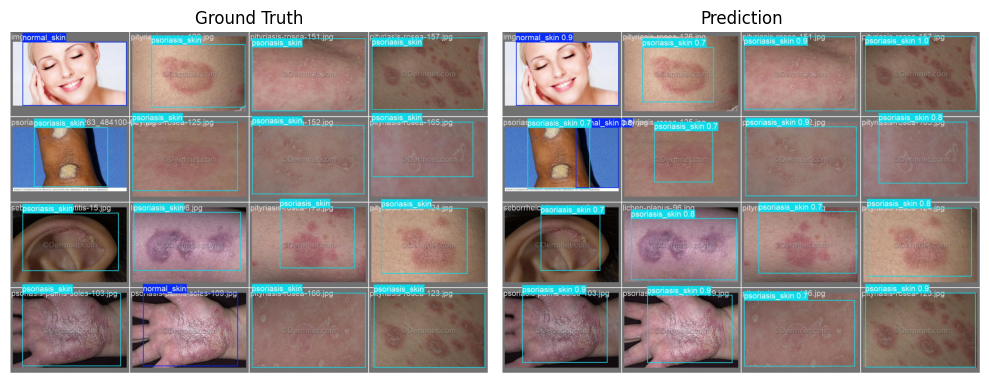

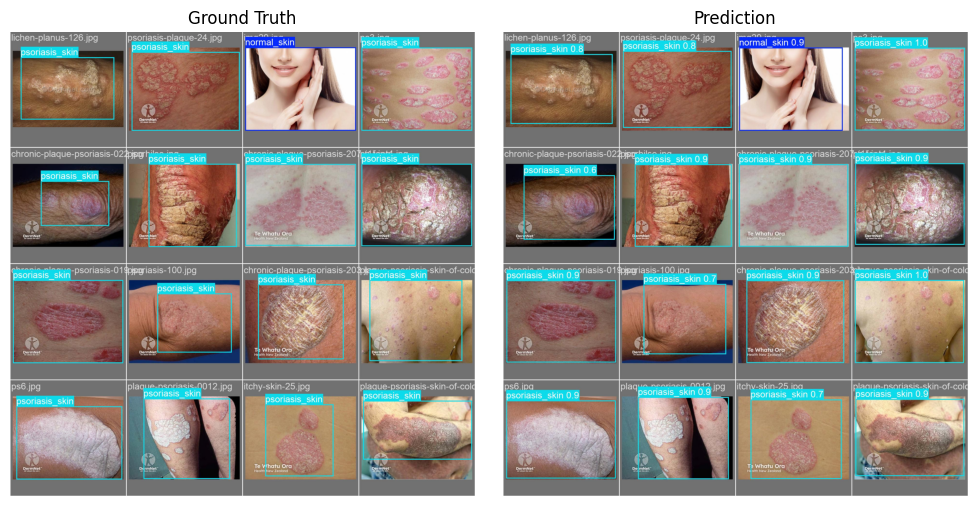

In [14]:
# Display paired result images
def display_result_image_pairs(results_dir, image_pairs):
    """
    Display paired result images (e.g., ground truth vs predictions).
    Args:
        results_dir: Path to the results directory.
        image_pairs: List of tuples containing pairs of image filenames to compare.
    """
    for label_image, pred_image in image_pairs:
        label_path = os.path.join(results_dir, label_image)
        pred_path = os.path.join(results_dir, pred_image)
        
        if os.path.exists(label_path) and os.path.exists(pred_path):
            label_img = cv2.imread(label_path)
            pred_img = cv2.imread(pred_path)

            label_img = cv2.cvtColor(label_img, cv2.COLOR_BGR2RGB)
            pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(label_img)
            plt.title("Ground Truth")
            plt.axis("off")

            plt.subplot(1, 2, 2)
            plt.imshow(pred_img)
            plt.title("Prediction")
            plt.axis("off")

            plt.tight_layout()
            plt.show()
        else:
            print(f"Files not found: {label_image} or {pred_image}")

# Path to YOLO results
results_dir = '/kaggle/working/yolo_project/psoriasis_detection_final'
image_pairs = [ 
    ("val_batch0_labels.jpg", "val_batch0_pred.jpg"),
    ("val_batch1_labels.jpg", "val_batch1_pred.jpg")
]

# Display results
display_result_image_pairs(results_dir, image_pairs)

In [16]:
# Load the best model
best_model_path = '/kaggle/working/yolo_project/psoriasis_detection_final/weights/best.pt'
best_model = YOLO(best_model_path)

Evaluating Validation Images:   0%|          | 0/108 [00:00<?, ?it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/chronic-plaque-psoriasis-022.jpg: 480x640 1 psoriasis_skin, 39.7ms
Speed: 1.5ms preprocess, 39.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Evaluating Validation Images:   1%|          | 1/108 [00:00<00:18,  5.74it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img77.jpg: 640x576 1 normal_skin, 38.4ms
Speed: 2.0ms preprocess, 38.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img42.jpg: 640x416 1 normal_skin, 38.1ms
Speed: 1.9ms preprocess, 38.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 416)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img150.jpg: 640x512 1 normal_skin, 37.3ms
Speed: 1.9ms preprocess, 37.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Evaluating Validation Images:   4%|▎         | 4/108 [00:00<00:07, 13.89it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img16.jpg: 544x640 1 normal_skin, 37.6ms
Speed: 1.8ms preprocess, 37.6ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/pityriasis-rosea-125.jpg: 448x640 1 psoriasis_skin, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img123.png: 640x384 1 normal_skin, 37.2ms
Speed: 1.4ms preprocess, 37.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Evaluating Validation Images:   6%|▋         | 7/108 [00:00<00:05, 16.90it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-pustular-generalized-26.jpg: 448x640 1 psoriasis_skin, 7.1ms
Speed: 2.0ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img33.jpg: 640x640 1 normal_skin, 8.2ms
Speed: 2.7ms preprocess, 8.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img9.jpg: 640x576 1 normal_skin, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/pityriasis-rosea-105.jpg: 640x576 1 psoriasis_skin, 7.3ms
Speed: 2.4ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-pustular-generalized-59.jpg: 448x640 1 psoriasis_skin, 7.1ms
Sp

Evaluating Validation Images:  12%|█▏        | 13/108 [00:00<00:03, 28.74it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img21.jpg: 640x224 1 normal_skin, 36.6ms
Speed: 1.0ms preprocess, 36.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 224)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-Chronic-plaque-00325.jpg: 448x640 1 psoriasis_skin, 7.8ms
Speed: 1.9ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/lichen-planus-20.jpg: 448x640 1 psoriasis_skin, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img85.jpg: 640x448 1 normal_skin, 37.6ms
Speed: 1.8ms preprocess, 37.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Evaluating Validation Images:  16%|█▌        | 17/108 [00:00<00:03, 29.53it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/pityriasis-rosea-164.jpg: 448x640 1 psoriasis_skin, 7.2ms
Speed: 1.9ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/pityriasis-rosea-126.jpg: 448x640 1 psoriasis_skin, 6.7ms
Speed: 1.9ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/chronic-plaque-psoriasis-019.jpg: 480x640 1 psoriasis_skin, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/pityriasis-rosea-178.jpg: 448x640 1 psoriasis_skin, 7.0ms
Speed: 1.8ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img17.jpg: 640x576 1 normal_skin, 8.1ms
S

Evaluating Validation Images:  21%|██▏       | 23/108 [00:00<00:02, 36.98it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/ps3.jpg: 480x640 1 psoriasis_skin, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/pityriasis-rosea-165.jpg: 448x640 1 psoriasis_skin, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img18.jpg: 640x288 1 normal_skin, 38.3ms
Speed: 1.1ms preprocess, 38.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 288)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/plaque-psoriasis-skin-of-colour-00001.jpg: 480x640 1 psoriasis_skin, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img27.jpg: 640x544 1 normal_skin, 38.9ms
Speed: 2.6ms preprocess,

Evaluating Validation Images:  26%|██▌       | 28/108 [00:00<00:02, 35.02it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-pustular-generalized-57.jpg: 448x640 1 psoriasis_skin, 6.9ms
Speed: 2.0ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img94.png: 640x416 1 normal_skin, 7.2ms
Speed: 1.8ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/pityriasis-rosea-123.jpg: 448x640 1 psoriasis_skin, 7.4ms
Speed: 1.9ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/seborrheic-dermatitis-15.jpg: 448x640 2 psoriasis_skins, 6.2ms
Speed: 1.9ms preprocess, 6.2ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img24.jpg: 640x576 1 normal_skin, 8.1ms
Speed: 2.

Evaluating Validation Images:  31%|███▏      | 34/108 [00:01<00:02, 35.95it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-palms-soles-16.jpg: 640x448 1 psoriasis_skin, 7.0ms
Speed: 2.1ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/pityriasis-rosea-177.jpg: 448x640 1 psoriasis_skin, 6.9ms
Speed: 1.9ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img10.jpg: 640x352 1 normal_skin, 39.1ms
Speed: 1.3ms preprocess, 39.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 352)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/ps6.jpg: 480x640 1 psoriasis_skin, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Evaluating Validation Images:  35%|███▌      | 38/108 [00:01<00:01, 36.91it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/pityriasis-rosea-16.jpg: 544x640 1 psoriasis_skin, 7.9ms
Speed: 2.4ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img28.jpg: 448x640 1 normal_skin, 7.4ms
Speed: 2.1ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-arm-001.jpg: 480x640 1 psoriasis_skin, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img15.jpg: 640x352 1 normal_skin, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 352)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img14.jpg: 640x288 1 normal_skin, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 1.2ms p

Evaluating Validation Images:  41%|████      | 44/108 [00:01<00:01, 39.16it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img29.jpg: 480x640 1 normal_skin, 7.2ms
Speed: 3.1ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-plaque-24.jpg: 480x640 1 psoriasis_skin, 6.5ms
Speed: 1.3ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img32.jpg: 640x320 1 normal_skin, 39.1ms
Speed: 1.3ms preprocess, 39.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 320)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/pityriasis-rosea-152.jpg: 448x640 1 psoriasis_skin, 7.6ms
Speed: 2.4ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Evaluating Validation Images:  44%|████▍     | 48/108 [00:01<00:01, 38.39it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img5.jpg: 384x640 1 normal_skin, 40.1ms
Speed: 2.0ms preprocess, 40.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-pustular-generalized-48.jpg: 448x640 1 psoriasis_skin, 7.4ms
Speed: 1.9ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/chronic-plaque-psoriasis-017.jpg: 480x640 1 psoriasis_skin, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/facial-psoriasis21.jpg: 480x640 1 psoriasis_skin, 6.2ms
Speed: 1.2ms preprocess, 6.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Evaluating Validation Images:  48%|████▊     | 52/108 [00:01<00:01, 38.39it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-slide-463x263_484100-001.jpg: 384x640 1 normal_skin, 1 psoriasis_skin, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-palms-soles-103.jpg: 448x640 1 psoriasis_skin, 7.5ms
Speed: 1.9ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/dscn5036.jpg: 480x640 1 psoriasis_skin, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img3.jpg: 640x576 1 normal_skin, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img4.jpg: 640x640 1 normal_skin, 8.1ms
Speed: 

Evaluating Validation Images:  54%|█████▎    | 58/108 [00:01<00:01, 43.44it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/chronic-plaque-psoriasis-208.jpg: 480x640 1 psoriasis_skin, 6.4ms
Speed: 1.3ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psorhilse.jpg: 480x640 1 psoriasis_skin, 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-pustular-generalized-40.jpg: 640x448 1 psoriasis_skin, 7.3ms
Speed: 1.9ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/lichen-planus-96.jpg: 448x640 1 psoriasis_skin, 7.7ms
Speed: 2.0ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-palms-soles-15.jpg: 640x448 1 pso

Evaluating Validation Images:  59%|█████▉    | 64/108 [00:01<00:00, 46.92it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/pityriasis-rosea-179.jpg: 448x640 1 psoriasis_skin, 7.5ms
Speed: 1.9ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img43.jpg: 640x512 1 normal_skin, 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-palms-soles-13.jpg: 640x448 1 psoriasis_skin, 7.1ms
Speed: 1.9ms preprocess, 7.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img22.jpg: 640x224 4 normal_skins, 7.2ms
Speed: 0.9ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 224)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img30.jpg: 640x384 1 normal_skin, 7.2ms
Speed: 1.8ms preprocess, 7.2ms inference

Evaluating Validation Images:  65%|██████▍   | 70/108 [00:01<00:00, 50.04it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img70.jpg: 448x640 1 normal_skin, 6.1ms
Speed: 1.7ms preprocess, 6.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img19.jpg: 640x480 1 normal_skin, 7.0ms
Speed: 1.7ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img121.png: 640x544 1 normal_skin, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/plaque-psoriasis-0012.jpg: 480x640 1 psoriasis_skin, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-palms-soles-109.jpg: 448x640 1 psoriasis_skin, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inferen

Evaluating Validation Images:  70%|███████   | 76/108 [00:02<00:00, 51.92it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img2 (2).jpg: 608x640 1 normal_skin, 40.9ms
Speed: 2.5ms preprocess, 40.9ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img26.jpg: 640x544 1 normal_skin, 8.0ms
Speed: 2.6ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img73.jpg: 640x640 1 normal_skin, 8.2ms
Speed: 2.2ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-100.jpg: 480x640 1 psoriasis_skin, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img13.jpg: 640x352 1 normal_skin, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per i

Evaluating Validation Images:  76%|███████▌  | 82/108 [00:02<00:00, 41.96it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-palms-soles-12.jpg: 640x448 1 psoriasis_skin, 7.0ms
Speed: 1.8ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/pityriasis-rubra-pilaris-18.jpg: 448x640 1 psoriasis_skin, 7.2ms
Speed: 1.8ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img11.jpg: 640x288 2 normal_skins, 7.6ms
Speed: 1.1ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 288)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/chronic-plaque-psoriasis-207 (1).jpg: 480x640 1 psoriasis_skin, 6.9ms
Speed: 1.2ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/pityriasis-rubra-pilaris-33.jpg: 544x640 1 

Evaluating Validation Images:  81%|████████▏ | 88/108 [00:02<00:00, 45.03it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-palms-soles-87.jpg: 448x640 1 psoriasis_skin, 7.2ms
Speed: 1.9ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img8.jpg: 640x576 1 normal_skin, 8.0ms
Speed: 2.1ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img31.jpg: 640x320 1 normal_skin, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 320)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img35.jpg: 640x416 1 normal_skin, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 416)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/lichen-planus-126.jpg: 448x640 1 psoriasis_skin, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 1.4

Evaluating Validation Images:  87%|████████▋ | 94/108 [00:02<00:00, 47.94it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img158.jpg: 640x416 1 normal_skin, 7.5ms
Speed: 1.8ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 416)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/pityriasis-rosea-157.jpg: 448x640 1 psoriasis_skin, 7.8ms
Speed: 1.9ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/seborrheic-dermatitis-14.jpg: 448x640 1 psoriasis_skin, 6.7ms
Speed: 1.9ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img41.jpg: 640x576 1 normal_skin, 8.1ms
Speed: 2.8ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/plaque-psoriasis-0016.jpg: 480x640 1 psoriasis_skin, 7.9ms
Speed: 1.2ms preproce

Evaluating Validation Images:  93%|█████████▎| 100/108 [00:02<00:00, 48.22it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/seborrheic-dermatitis-10.jpg: 448x640 1 psoriasis_skin, 7.4ms
Speed: 1.9ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/chronic-plaque-psoriasis-207.jpg: 480x640 1 psoriasis_skin, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/plaque-psoriasis-skin-of-colour-00002.jpg: 480x640 1 psoriasis_skin, 6.5ms
Speed: 1.1ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img156.jpg: 640x352 1 normal_skin, 7.7ms
Speed: 1.9ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 352)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/chronic-plaque-psoriasis-016.jpg: 480

Evaluating Validation Images:  98%|█████████▊| 106/108 [00:02<00:00, 50.76it/s]


image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/img1 (2).jpg: 640x576 1 normal_skin, 8.0ms
Speed: 2.2ms preprocess, 8.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /kaggle/input/posaris-data/organized_dataset/val/images/psoriasis-Chronic-plaque-00316.jpg: 640x448 1 psoriasis_skin, 7.1ms
Speed: 1.8ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Evaluating Validation Images: 100%|██████████| 108/108 [00:02<00:00, 40.13it/s]


Classification Report:
                precision    recall  f1-score   support

   normal_skin       1.00      0.98      0.99        47
psoriasis_skin       0.98      1.00      0.99        61

      accuracy                           0.99       108
     macro avg       0.99      0.99      0.99       108
  weighted avg       0.99      0.99      0.99       108



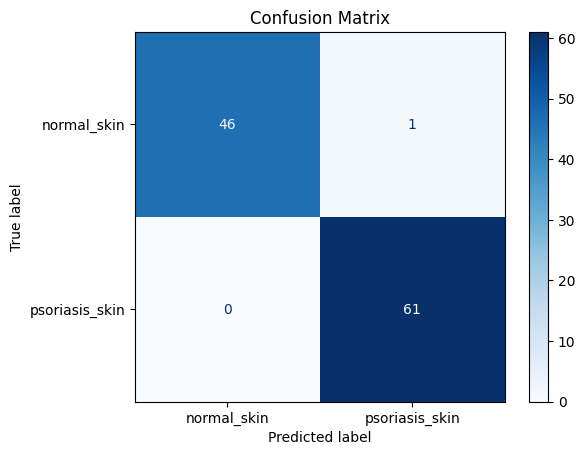

In [17]:
# Evaluate model predictions
def evaluate_model_with_metrics(model, val_images_path, val_labels_path):
    predictions = []
    ground_truths = []

    for image_name in tqdm(os.listdir(val_images_path), desc="Evaluating Validation Images"):
        if image_name.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(val_images_path, image_name)

            # Get predictions from YOLO model
            results = model.predict(source=image_path, save=False, conf=0.25)
            if len(results[0].boxes.cls) > 0:
                pred_class = int(results[0].boxes.cls[0].item())
            else:
                pred_class = -1  # No detection
            predictions.append(pred_class)

            # Read ground truth label
            label_file = image_name.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt')
            label_path = os.path.join(val_labels_path, label_file)
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    ground_truth = int(f.readline().strip().split()[0])
                    ground_truths.append(ground_truth)
            else:
                ground_truths.append(-1)

    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(ground_truths, predictions, target_names=['normal_skin', 'psoriasis_skin']))

    # Generate confusion matrix
    cm = confusion_matrix(ground_truths, predictions, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal_skin', 'psoriasis_skin'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# Call the function
evaluate_model_with_metrics(best_model, val_images_path, val_labels_path)

In [27]:
import os
import shutil

# Path to your trained weights
weight_file = '/kaggle/working/yolo_project/psoriasis_detection_final/weights/best.pt'

# Source directory for images
source = '/kaggle/input/posaris-data/organized_dataset/val/images'

# Load the YOLO model
model = YOLO(weight_file)

# Perform detection
results = model.predict(
    source=source,       # Directory or file to run inference on
    imgsz=640,           # Image size
    conf=0.4,            # Confidence threshold
    save=True,           # Save output images
    save_txt=True,       # Save detection results in YOLO format (labels)
    save_conf=True       # Save confidence scores in output labels
)

# The default save directory
output_dir = model.predictor.save_dir
print(f"Detection results saved to: {output_dir}")

# Optional: Move labels to a specific directory
output_labels_dir = os.path.join(output_dir, 'labels')
if os.path.exists(output_labels_dir):
    print(f"Labels saved to: {output_labels_dir}")
else:
    print("Labels directory not found.")


image 1/108 /kaggle/input/posaris-data/organized_dataset/val/images/chronic-plaque-psoriasis-016.jpg: 480x640 1 psoriasis_skin, 11.0ms
image 2/108 /kaggle/input/posaris-data/organized_dataset/val/images/chronic-plaque-psoriasis-017.jpg: 480x640 1 psoriasis_skin, 6.6ms
image 3/108 /kaggle/input/posaris-data/organized_dataset/val/images/chronic-plaque-psoriasis-019.jpg: 480x640 1 psoriasis_skin, 7.0ms
image 4/108 /kaggle/input/posaris-data/organized_dataset/val/images/chronic-plaque-psoriasis-022.jpg: 480x640 1 psoriasis_skin, 6.6ms
image 5/108 /kaggle/input/posaris-data/organized_dataset/val/images/chronic-plaque-psoriasis-203.jpg: 480x640 1 psoriasis_skin, 6.4ms
image 6/108 /kaggle/input/posaris-data/organized_dataset/val/images/chronic-plaque-psoriasis-207 (1).jpg: 480x640 1 psoriasis_skin, 6.6ms
image 7/108 /kaggle/input/posaris-data/organized_dataset/val/images/chronic-plaque-psoriasis-207.jpg: 480x640 1 psoriasis_skin, 6.6ms
image 8/108 /kaggle/input/posaris-data/organized_dataset

In [19]:
# Evaluate the model on the validation set
val_results = best_model.val()

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/input/posaris-data/organized_dataset/val/labels... 108 images, 0 backgrounds, 0 corrupt: 100%|██████████| 108/108 [00:00<00:00, 757.08it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/posaris-data/organized_dataset/val is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]


                   all        108        108      0.945      0.974      0.979      0.858
           normal_skin         47         47      0.939      0.979      0.981      0.958
        psoriasis_skin         61         61      0.952      0.968      0.977      0.758
Speed: 0.2ms preprocess, 7.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val


In [22]:
# Evaluate the model on the validation set
val_results = best_model.val()

# Extract precision, recall, and mAP
precision = val_results.box.p  # Precision per class
recall = val_results.box.r     # Recall per class
map_50 = val_results.box.map50  # mAP@0.5 (mean across all classes)
map_50_95 = val_results.box.map  # mAP@0.5:0.95 (mean across all classes)

print(f"Precision (per class): {precision}")
print(f"Recall (per class): {recall}")
print(f"mAP@0.5: {map_50:.2f}")
print(f"mAP@0.5:0.95: {map_50_95:.2f}")

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/input/posaris-data/organized_dataset/val/labels... 108 images, 0 backgrounds, 0 corrupt: 100%|██████████| 108/108 [00:00<00:00, 783.61it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/posaris-data/organized_dataset/val is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.61it/s]


                   all        108        108      0.945      0.974      0.979      0.858
           normal_skin         47         47      0.939      0.979      0.981      0.958
        psoriasis_skin         61         61      0.952      0.968      0.977      0.758
Speed: 0.2ms preprocess, 5.2ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val2
Precision (per class): [    0.93874     0.95167]
Recall (per class): [    0.97872     0.96835]
mAP@0.5: 0.98
mAP@0.5:0.95: 0.86


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [29]:
import numpy as np
from tqdm import tqdm

# Function to calculate IoU between two bounding boxes
def calculate_iou(box1, box2):
    """
    Calculate IoU between two bounding boxes.
    box1 and box2 should be in the format [x1, y1, x2, y2].
    """
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Compute the area of overlap
    overlap_area = max(0, x2 - x1) * max(0, y2 - y1)

    # Compute the area of each box
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Compute the area of union
    union_area = box1_area + box2_area - overlap_area

    # Compute IoU
    iou = overlap_area / union_area if union_area > 0 else 0
    return iou

def parse_label_file(file_path):
    """
    Parse a YOLO format label file and return bounding boxes in the format [x1, y1, x2, y2].
    """
    boxes = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            values = line.strip().split()
            if len(values) < 5:
                continue  # Skip invalid lines
            _, x, y, w, h = map(float, values[:5])  # Use only the first 5 values
            x1 = x - w / 2
            y1 = y - h / 2
            x2 = x + w / 2
            y2 = y + h / 2
            boxes.append([x1, y1, x2, y2])
    return boxes

# Function to evaluate Mean IoU
def evaluate_mean_iou(predictions_dir, ground_truth_dir):
    """
    Calculate mean IoU between predictions and ground truth labels.
    Args:
        predictions_dir (str): Directory containing predicted label files.
        ground_truth_dir (str): Directory containing ground truth label files.
    Returns:
        float: Mean IoU across all label files.
    """
    ious = []

    for filename in tqdm(os.listdir(ground_truth_dir), desc="Calculating IoU"):
        ground_truth_path = os.path.join(ground_truth_dir, filename)
        prediction_path = os.path.join(predictions_dir, filename)

        if os.path.exists(ground_truth_path) and os.path.exists(prediction_path):
            ground_truth_boxes = parse_label_file(ground_truth_path)
            prediction_boxes = parse_label_file(prediction_path)

            for pred_box in prediction_boxes:
                best_iou = 0
                for gt_box in ground_truth_boxes:
                    iou = calculate_iou(pred_box, gt_box)
                    best_iou = max(best_iou, iou)
                ious.append(best_iou)

    return np.mean(ious) if ious else 0

# Paths to predictions and ground truth labels
predictions_labels = os.path.join(model.predictor.save_dir, 'labels')
ground_truth_labels = '/kaggle/input/posaris-data/organized_dataset/val/labels'

# Calculate Mean IoU
mean_iou = evaluate_mean_iou(predictions_labels, ground_truth_labels)
print(f"Mean IoU on Validation Set: {mean_iou:.2f}")


Calculating IoU: 100%|██████████| 108/108 [00:00<00:00, 638.04it/s]

Mean IoU on Validation Set: 0.87
